<h1><span style='font-family: "Trebuchet MS", Helvetica, sans-serif;'>Recommendation Systems - Module Project</span></h1>

<ul>
    <li>
        <span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;"><strong>DOMAIN:</strong> Smartphone, Electronics</span>
    </li>
</ul>
<p><br></p>

# CONTEXT:
India is the second largest market globally for smartphones after China. About 134 million smartphones were sold across India 
in the year 2017 and is estimated to increase to about 442 million in 2022. India ranked second in the average time spent on mobile web by 
smartphone users across Asia Pacific. The combination of very high sales volumes and the average smartphone consumer behaviour has 
made India a very attractive market for foreign vendors. As per Consumer behaviour, 97% of consumers turn to a search engine when they 
are buying a product vs. 15% who turn to social media. If a seller succeeds to publish smartphones based on user’s behaviour/choice at the 
right place, there are 90% chances that user will enquire for the same. This Case Study is targeted to build a recommendation system 
based on individual consumer’s behaviour or choice.</font>
</article>

DATA DESCRIPTION: Phone Reviews
• author : name of the person who gave the rating<br>
• country : country the person who gave the rating belongs to<br>
• date : date of the rating<br>
• domain: website from which the rating was taken from<br>
• extract: rating content<br>
• language: language in which the rating was given<br>
• product: name of the product/mobile phone for which the rating was given<br>
• score: average rating for the phone<br>
• score_max: highest rating given for the phone<br>
• source: source from where the rating was taken<br></span></article>

# PROJECT OBJECTIVE:
</ul>We will build a recommendation system using popularity based and collaborative filtering methods to recommend 
mobile phones to a user which are most popular and personalised respectively.</span></p>
<p><br></p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import os
import glob
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from zipfile import ZipFile
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import math
import json
import time
# import sklearn.external.joblib as extjoblib
import joblib
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
# from sklearn.externals import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import pprint
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
#import swifter
# filterwarnings to ignore all unnecessary warnings and logs
import warnings
warnings.filterwarnings('ignore')
from surprise import SVD, KNNWithMeans
from surprise import accuracy
from surprise import Dataset,Reader
from surprise.model_selection import GridSearchCV
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate

# 1. Import and explore the data.

In [2]:
# Import the dataset and give the column names
# columns=['phone_url','date','lang','country','source','domain','score','score_max','extract','author','product']
phone_user_review1_df=pd.read_csv('phone_user_review_file_1.csv',encoding='ISO-8859-1')
phone_user_review2_df=pd.read_csv('phone_user_review_file_2.csv',encoding='ISO-8859-1')
phone_user_review3_df=pd.read_csv('phone_user_review_file_3.csv',encoding='ISO-8859-1')
phone_user_review4_df=pd.read_csv('phone_user_review_file_4.csv',encoding='ISO-8859-1')
phone_user_review5_df=pd.read_csv('phone_user_review_file_5.csv',encoding='ISO-8859-1')
phone_user_review6_df=pd.read_csv('phone_user_review_file_6.csv',encoding='ISO-8859-1')
# Concatenating dataframes without duplicates 
combined_phone_user_review_df = pd.concat([phone_user_review1_df, phone_user_review2_df, phone_user_review3_df, 
                                           phone_user_review4_df, phone_user_review5_df,phone_user_review6_df]).drop_duplicates() 

In [3]:
combined_phone_user_review_df.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,05-02-2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,05-04-2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,05-02-2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,05-11-2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [4]:
from colorama import Fore, Back, Style
rows, columns = combined_phone_user_review_df.shape
print(Fore.YELLOW + "No of rows: ", Style.RESET_ALL,rows) 
print(Fore.YELLOW + "No of columns: ", Style.RESET_ALL,columns)

No of rows:   1408721
No of columns:   11


In [5]:
combined_phone_user_review_df=combined_phone_user_review_df.round({"score":0})

In [6]:
combined_phone_user_review_df.isna().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63093
score_max    63093
extract      19014
author       61817
product          1
dtype: int64

In [7]:
combined_phone_user_review_df.score_max.value_counts(dropna=False, normalize=True)

10.0    0.955213
NaN     0.044787
Name: score_max, dtype: float64

In [8]:
null=pd.isnull(combined_phone_user_review_df["score"]) 
combined_phone_user_review_df[null]

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
489,/cellphones/samsung-galaxy-s8/,4/15/2017,ru,ru,Ð¡Ð²ÑÐ·Ð½Ð¾Ð¹,svyaznoy.ru,NaN,NaN,"Ð²ÑÐµ Ð½ÑÐ°Ð²Ð¸ÑÑÑ, Ð½Ðµ Ð¿Ð¾Ð»ÑÐ·Ð¾Ð²Ð°...",ÐÐ¼Ð¸ÑÑÐ¸Ð¹ Ð¡ÐµÑÐ³ÐµÐµÐ²,Samsung Galaxy S8 (Ð¶ÐµÐ»ÑÑÐ¹ ÑÐ¾Ð¿Ð°Ð·)
490,/cellphones/samsung-galaxy-s8/,4/15/2017,ru,ru,Ð¡Ð²ÑÐ·Ð½Ð¾Ð¹,svyaznoy.ru,NaN,NaN,"Ð´Ð¾ÑÐ¾Ð³Ð¾Ð¹ Ð±ÑÐ´Ð¶ÐµÑÐ½Ð¸Ðº, Ð½Ðµ Ð´Ð»Ñ...",ÐÐ°Ð´ÐµÐ¶Ð´Ð°,Samsung Galaxy S8 (Ð¶ÐµÐ»ÑÑÐ¹ ÑÐ¾Ð¿Ð°Ð·)
491,/cellphones/samsung-galaxy-s8/,4/15/2017,ru,ru,Ð¡Ð²ÑÐ·Ð½Ð¾Ð¹,svyaznoy.ru,NaN,NaN,2300 Ð¼Ð¸Ð»Ð»Ð¸Ð°Ð¼Ð¿ÐµÑ Ð² Ð±Ð°ÑÐ°ÑÐµÐµ â...,ÐÐ°ÑÐ²ÐµÐ¹ Ð.,Samsung Galaxy S8 (Ð¶ÐµÐ»ÑÑÐ¹ ÑÐ¾Ð¿Ð°Ð·)
492,/cellphones/samsung-galaxy-s8/,4/15/2017,ru,ru,Ð¡Ð²ÑÐ·Ð½Ð¾Ð¹,svyaznoy.ru,NaN,NaN,ÐÑÐ´Ñ ÐºÑÐ°ÑÐ¾Ðº: Ð² ÑÐ¾Ð½Ð¸ ÑÐ¾ÑÐ²Ð¾Ñ...,ÐÐ°Ð²ÐµÐ» Ð,Samsung Galaxy S8 (Ð¶ÐµÐ»ÑÑÐ¹ ÑÐ¾Ð¿Ð°Ð·)
493,/cellphones/samsung-galaxy-s8/,4/15/2017,ru,ru,Ð¡Ð²ÑÐ·Ð½Ð¾Ð¹,svyaznoy.ru,NaN,NaN,ÐÐ¾ÐºÑÐ¿Ð°Ð» ÑÐµÐ»ÐµÑÐ¾Ð½ ÑÐ¾Ð»ÑÐºÐ¾ Ð¸Ð...,ÐÐ³Ð¾ÑÑ,Samsung Galaxy S8 (Ð¶ÐµÐ»ÑÑÐ¹ ÑÐ¾Ð¿Ð°Ð·)
...,...,...,...,...,...,...,...,...,...,...,...
161209,/cellphones/motorola-m3788/,10/6/2014,tr,tr,Cepworld,cepworld.com,NaN,NaN,ilk kullandÄ±ÄÄ±m telefon 2000 yÄ±lÄ±nda almÄ...,BaÅkan,Motorola (391) M3788
161210,/cellphones/motorola-m3788/,3/11/2013,tr,tr,Cepworld,cepworld.com,NaN,NaN,bunun giriÅ kodlarÄ±nÄ± nasÄ±l acarÄ±m,sedat can,Motorola (391) M3788
161704,/cellphones/nokia-9000-communicator/,3/14/2015,tr,tr,Cepworld,cepworld.com,NaN,NaN,telefonun fiyati ne,mustafa can,Nokia (438) 9000 Communicator
163554,/cellphones/samsung-sgh-250/,3/11/2001,en,us,ReviewStream,reviewstream.com,NaN,NaN,I bougt mobile phone samsung sgh 250 on the 22...,razali,Samsung SGH 250


In [9]:
combined_phone_user_review_df=combined_phone_user_review_df.interpolate(method ='linear', limit_direction ='forward')

In [10]:
duplicated=combined_phone_user_review_df.duplicated()
combined_phone_user_review_df[duplicated]

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
351861,/cellphones/samsung-galaxy-s5/,11/28/2014,fi,fi,Verkkokauppa,verkkokauppa.com,10.0,10.0,Erinomainen paketti android 4.4:n kanssa. Teho...,norothir,"Samsung Galaxy S5, kulta"
353237,/cellphones/samsung-galaxy-s5/,07-11-2014,ru,ru,Ð¡Ð²ÑÐ·Ð½Ð¾Ð¹,svyaznoy.ru,9.0,10.0,NaN,NaN,Samsung Galaxy S5 SM-G900F 16GB (Ð·Ð¾Ð»Ð¾ÑÐ¸Ñ...
353456,/cellphones/samsung-galaxy-s5/,07-11-2014,ru,ru,Ð¡Ð²ÑÐ·Ð½Ð¾Ð¹,svyaznoy.ru,9.0,10.0,NaN,NaN,Samsung Galaxy S5 SM-G900F 16GB (ÑÐ¸Ð½Ð¸Ð¹)
354707,/cellphones/samsung-galaxy-s5/,5/21/2014,nl,be,KIESKEURIG,kieskeurig.be,9.0,10.0,Mooie telefoon die lekker licht is en veel voo...,nadorri,Samsung Galaxy S5 goud / 16 GB
354816,/cellphones/samsung-galaxy-s5/,05-07-2014,nl,be,KIESKEURIG,kieskeurig.be,10.0,10.0,Ik ben heel erg tevreden over deze telefoon. D...,kattepoes,Samsung Galaxy S5 goud / 16 GB
82040,/cellphones/htc-m8/,5/4/2015,nl,be,KIESKEURIG,kieskeurig.be,8.0,10.0,Een geweldig mooi vormgegeven telefoon met sup...,jorie70,HTC One (M8) zilver
77028,/cellphones/samsung-galaxy-note-iii/,11/20/2013,nl,nl,KIESKEURIG,kieskeurig.nl,9.0,10.0,Geweldig toestel zelfs al is het een erg groot...,Anja Heuvel,Samsung Galaxy Note 3 zwart / 32 GB - Overzicht
77135,/cellphones/samsung-galaxy-note-iii/,11/15/2013,nl,nl,KIESKEURIG,kieskeurig.nl,10.0,10.0,Sinds 29-10-2013 in het bezit van deze mooie t...,burnerchief,Samsung Galaxy Note 3 zwart / 32 GB - Overzicht
145657,/cellphones/nokia-lumia-925/,3/23/2014,nl,nl,Vergelijk,vergelijk.nl,9.0,10.0,Ik heb even getwijfeld tussen een IPhone en de...,Jan,Nokia Lumia 925 Zwart Sim Free
153837,/cellphones/samsung-galaxy-note-2/,1/5/2013,ru,ru,Ð¡Ð²ÑÐ·Ð½Ð¾Ð¹,svyaznoy.ru,10.0,10.0,NaN,ÐÐ»ÐµÐºÑÐ°Ð½Ð´Ñ,Samsung N7100 Galaxy Note II 16GB (ÑÐµÑÑÐ¹)


In [11]:
combined_phone_user_review_df=combined_phone_user_review_df.drop_duplicates()

In [12]:
combined_phone_user_review_df.drop(['product'], axis=1, inplace=True) # drop product
combined_phone_user_review_df['product'] = combined_phone_user_review_df['phone_url'].apply(lambda x : x.split('/')[-2])

pd.DataFrame(combined_phone_user_review_df['product'].value_counts()).T

,samsung-galaxy-s-iii,apple-iphone-5s,samsung-galaxy-s6,samsung-galaxy-s5,samsung-galaxy-s7-edge,motorola-moto-g,samsung-galaxy-s7-789999,samsung-i9500-galaxy-s-iv,huawei-p8-lite,lenovo-vibe-k4-note,...,lg-optimus-regard,tiptel-ergophone-6010,o2-xda-atom,orange-spv-c600,vivo-v5-plus,blackberry-dakota,motorola-qa4,samsung-corby-tv-sch-f339,eten-m810,benq-t51
product,16658,16287,16118,16023,15885,14439,13476,13136,12617,9653,...,1,1,1,1,1,1,1,1,1,1


In [13]:
# get the phone company
combined_phone_user_review_df['company'] = combined_phone_user_review_df['product'].apply(lambda x: x.split('-')[0].strip().lower())
pd.DataFrame(combined_phone_user_review_df.company.value_counts()).T

,samsung,nokia,sony,lg,apple,motorola,htc,huawei,lenovo,blackberry,...,latte,intermec,videocon,celkon,sierra,amoi,tecno,dopod,bang,tiptel
company,366623,190268,120185,115166,86404,86197,69120,65425,41559,31352,...,2,2,2,2,2,2,2,1,1,1


In [14]:
sample_df = combined_phone_user_review_df.sample(n = 1000000, random_state = 612) 

In [15]:
sample_df.drop(sample_df.columns.difference(['score','author','product','company']), 1, inplace=True)

    # drop 
        score_max column as it has only a single value 10 for all non-missing data points. Hence, it adds no information
        the variations in each phone model by it's description doesn't make it a new phone and we might not have enough data for each variation of the phone to recommend individual variants of each phone. 
        Date, source, Language, country, extract, domain are not significat in current recommendation system
        
        Engineered Features: author, product, score
        

In [16]:
sample_df

,score,author,product,company
333884,10.0,Massimo,motorola-moto-g,motorola
181535,10.0,Jan Reinders,lenovo-ideaphone-s820,lenovo
136335,8.0,ralph0722,siemens-a56-a56i,siemens
152559,6.0,usai antonello,sony-xperia-z5-premium,sony
159463,2.0,AK-47,samsung-galaxy-5-i5500,samsung
...,...,...,...,...
108793,10.0,ÐÐµÐ½Ð¸Ñ,huawei-u8150,huawei
105133,10.0,Joel-Gillian BABOUOT,sony-xperia-z-ultra,sony
285295,10.0,Dafne92,nokia-105,nokia
312771,10.0,DCP,nokia-lumia-930,nokia


# 2. Analyze
• Identify the most rated features.

• Identify the users with most number of reviews.

• Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final dataset.

In [17]:
from tqdm.notebook import tqdm
tqdm.pandas()
def bin_scores(row):
    if row.score>6:
        row['rating'] = 'high'
    elif row.score>3:
        row['rating'] = 'neutral'
    else:
        row['rating'] = 'low'
    return row

viz_df = sample_df.progress_apply(bin_scores, axis=1)

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [18]:
viz_df.rating.value_counts(dropna=False, normalize=True)

high       0.757869
neutral    0.145809
low        0.096322
Name: rating, dtype: float64

<AxesSubplot:xlabel='count', ylabel='rating'>

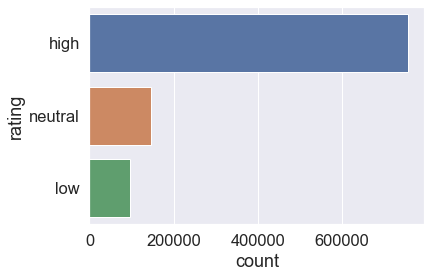

In [19]:
sns.set(font_scale=1.5)
sns.countplot(data=viz_df, y='rating', order = viz_df['rating'].value_counts().index)
plt.show()

     Most phones have high ratings, followed by neutral ratings followed by very less low rated phones.

<Figure size 4320x2160 with 0 Axes>

<AxesSubplot:xlabel='count', ylabel='company'>

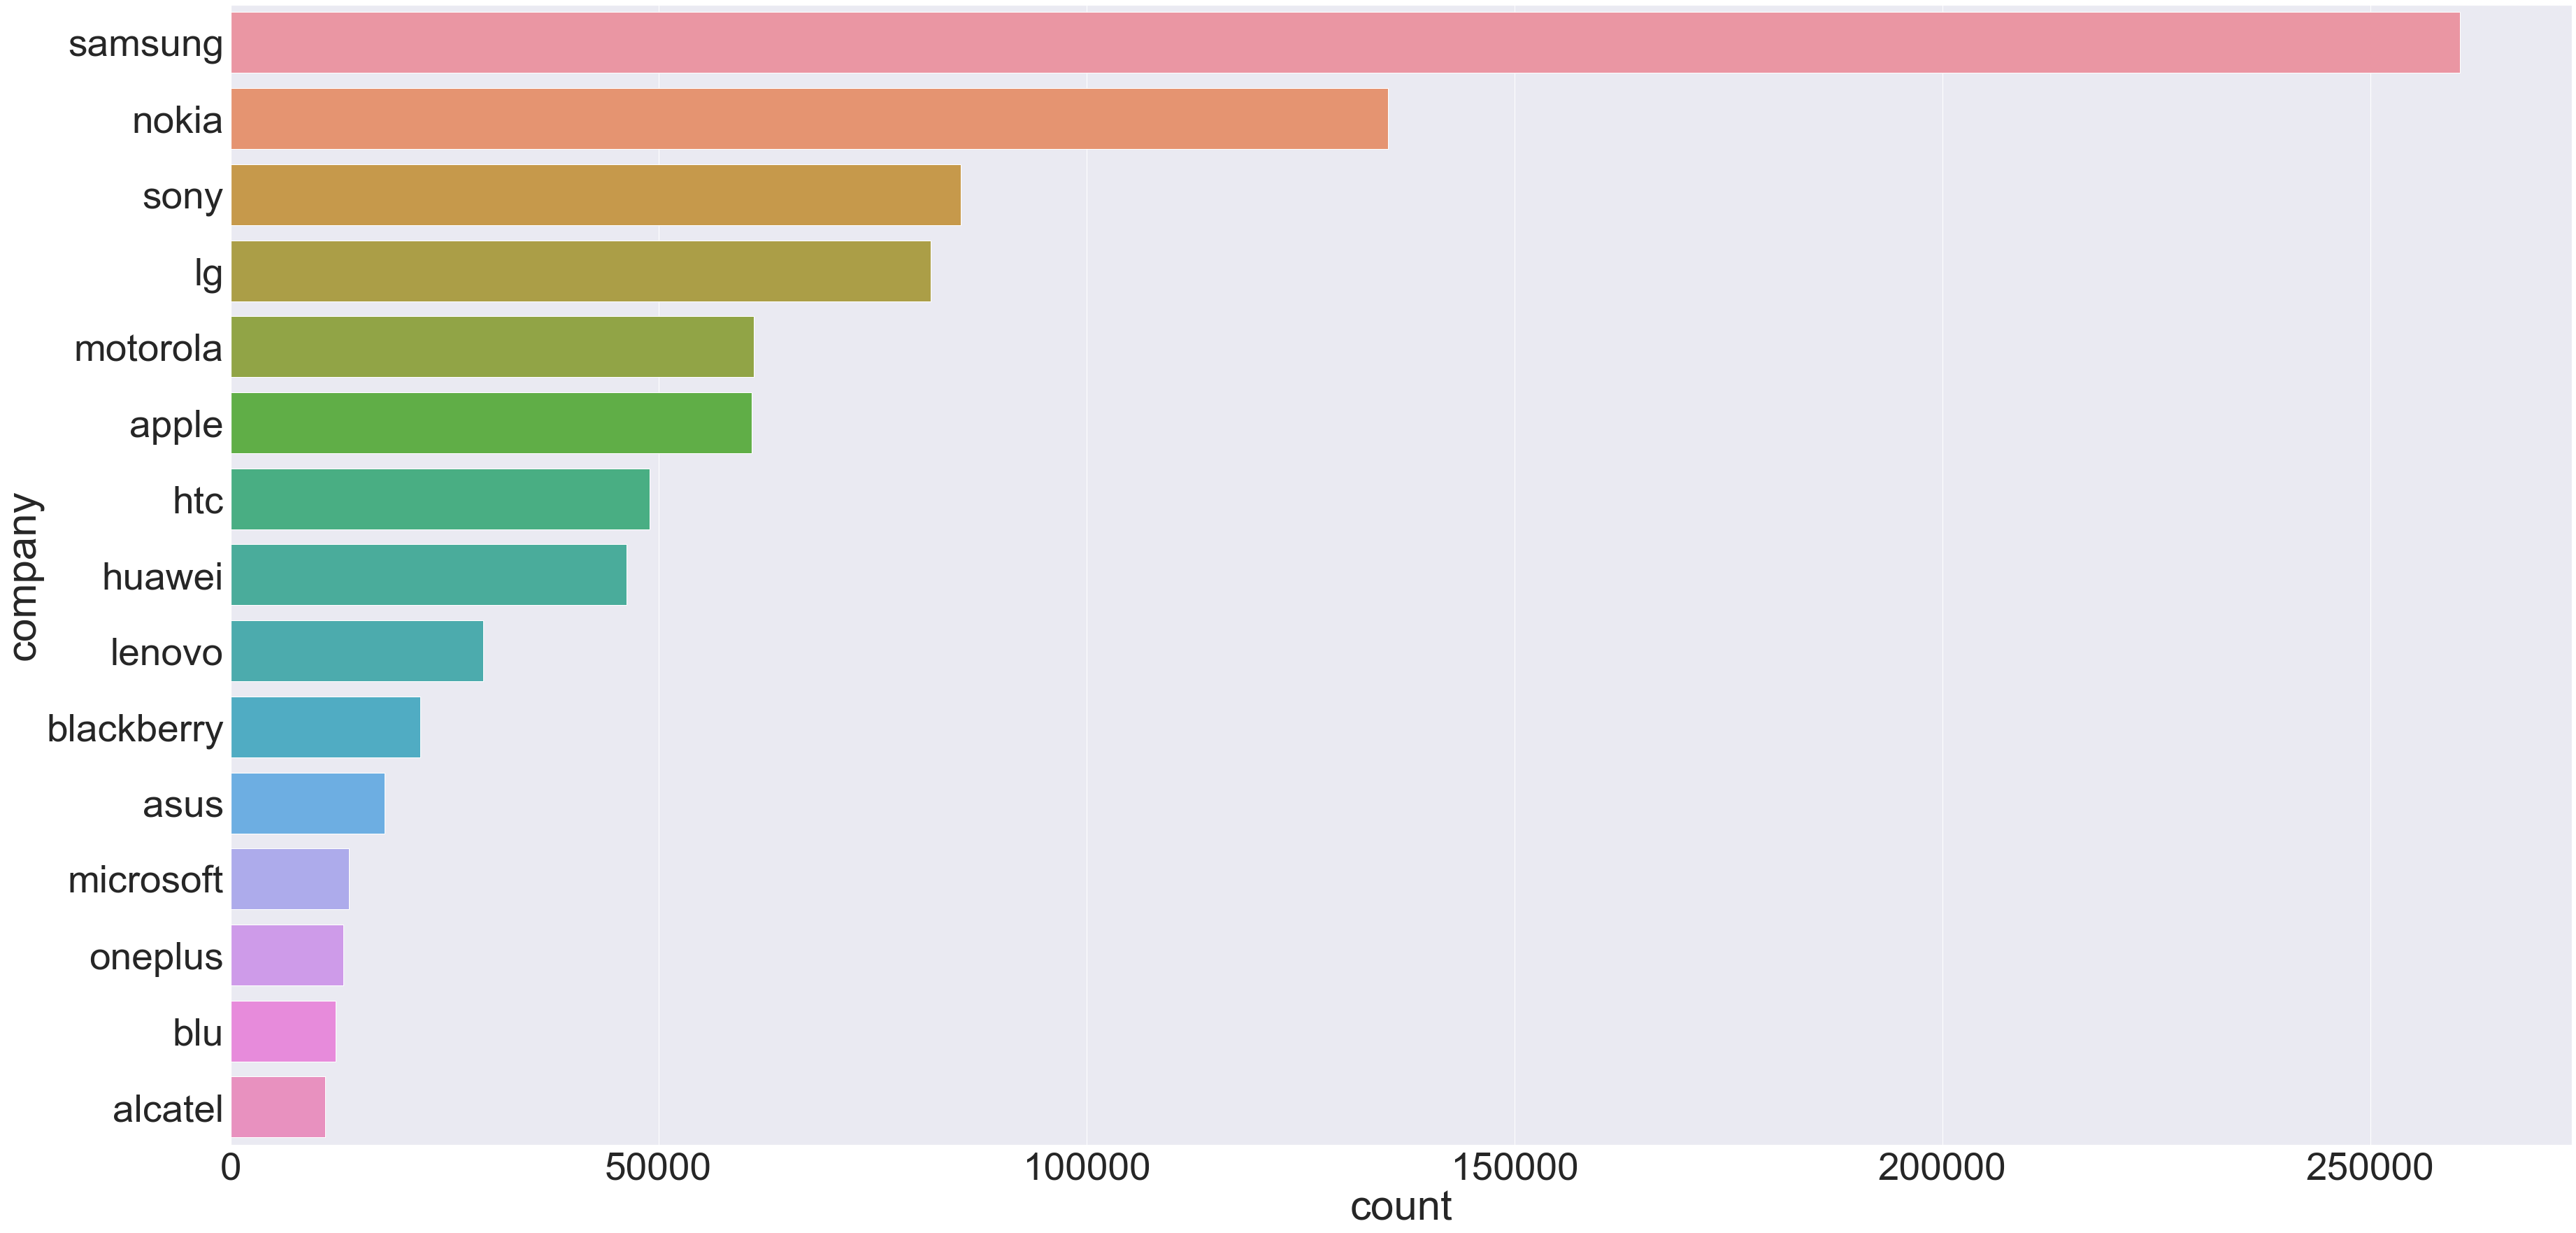

In [20]:
comp_df = pd.DataFrame(viz_df.company.value_counts().head(15))
sns.set(font_scale=5)
plt.figure(figsize=(60, 30))
top_40_companies = list(comp_df.index.unique())
comp_df_ = viz_df[viz_df.company.isin(top_40_companies)]
sns.countplot(data=comp_df_, y='company', order = comp_df_['company'].value_counts().index)
plt.show()

<Figure size 4320x2880 with 0 Axes>

<AxesSubplot:xlabel='count', ylabel='company'>

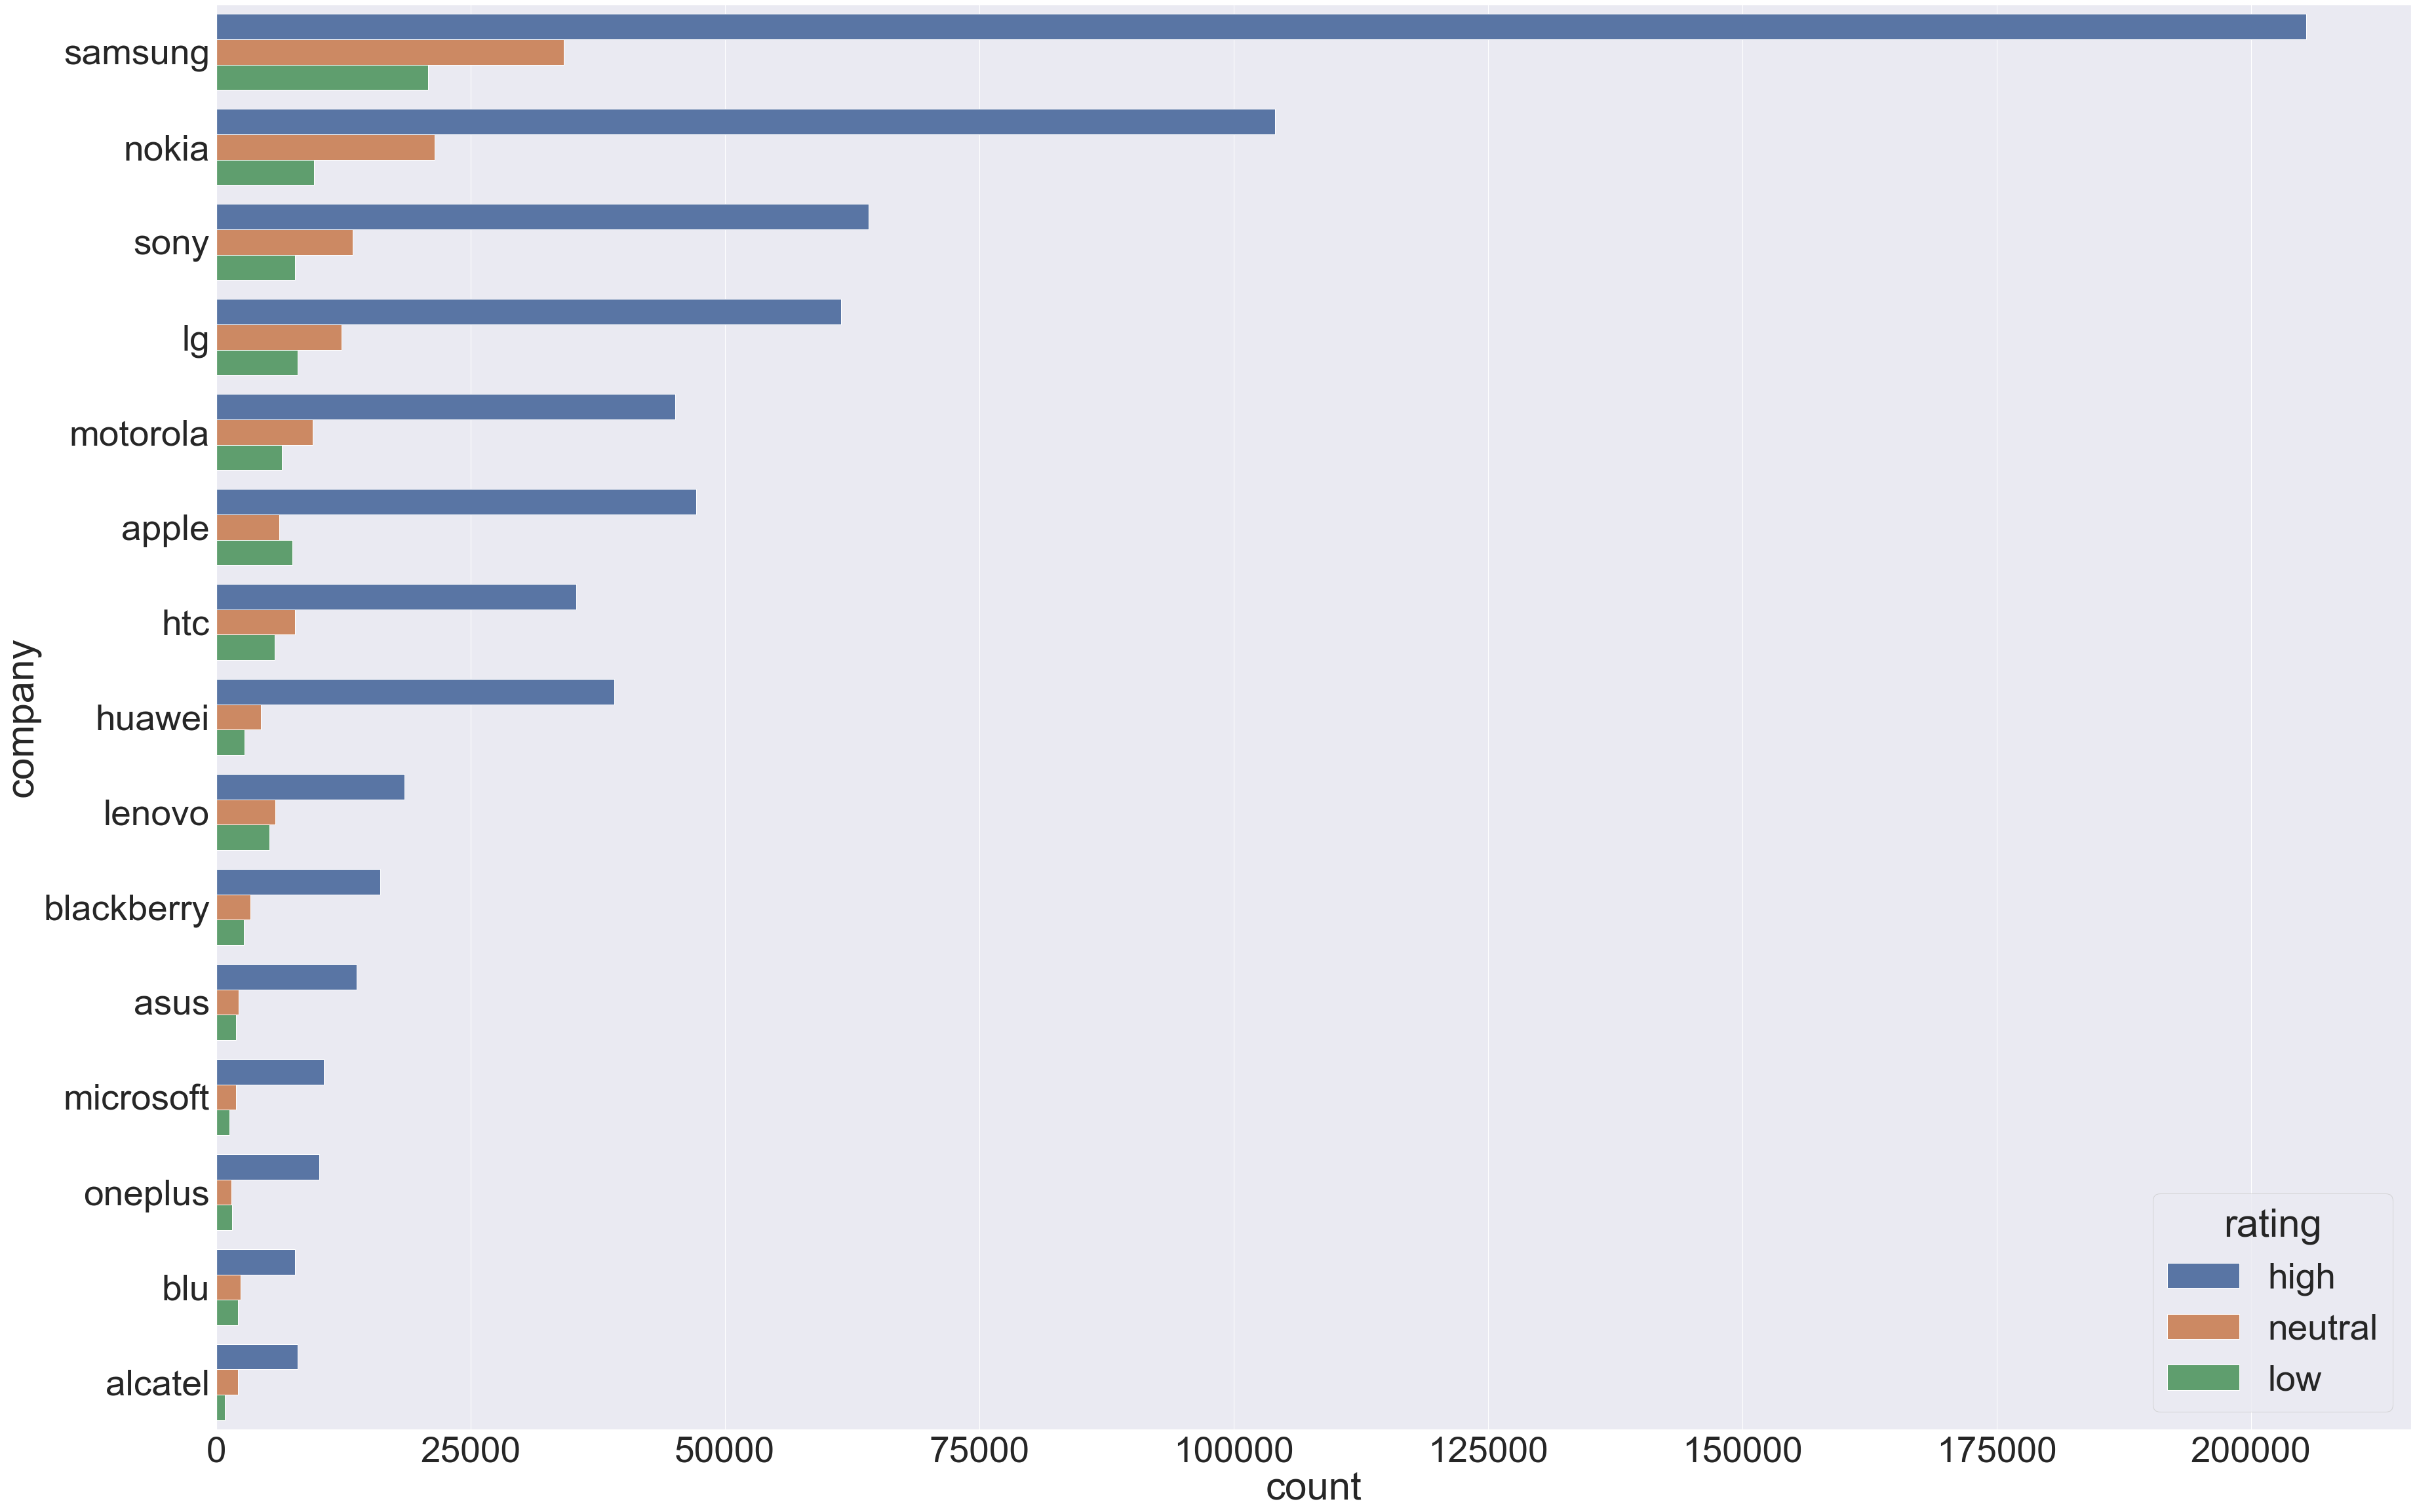

In [21]:
sns.set(font_scale=5)
plt.figure(figsize=(60, 40))
top_40_companies = list(comp_df.index.unique())
comp_df_ = viz_df[viz_df.company.isin(top_40_companies)]
sns.countplot(data=comp_df_, y='company', order = comp_df_['company'].value_counts().index, hue = 'rating')
plt.show()

     A few companies like samsung, nokia, lg, sony... seem to have the most number of reviews in our dataset indicative of their market share in the phones market in the given timeperiod fo 2007-2017. Also, we can see that most ratings for all companies seem to be high, and relatively less neutral ratings

   Users With most number of reviews

In [22]:
Top_User = sample_df.groupby('author').size().sort_values(ascending=False)[:10]
Top_User

author
Amazon Customer    54540
Cliente Amazon     13617
e-bit               5937
Client d'Amazon     5489
Amazon Kunde        3272
Anonymous           1905
einer Kundin        1890
einem Kunden        1350
unknown             1197
Anonymous           1023
dtype: int64

    Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final dataset

In [23]:
temp_df = pd.DataFrame(sample_df.author.value_counts())
temp_df = temp_df[temp_df.author > 50]
atleast_50_users = list(temp_df.index)
print(atleast_50_users[:50])

['Amazon Customer', 'Cliente Amazon', 'e-bit', "Client d'Amazon", 'Amazon Kunde', 'Anonymous', 'einer Kundin', 'einem Kunden', 'unknown', 'Anonymous ', 'Ð\x90Ð»ÐµÐºÑ\x81Ð°Ð½Ð´Ñ\x80', 'David', 'Ð¡ÐµÑ\x80Ð³ÐµÐ¹', 'Marco', 'Ð\x94Ð¼Ð¸Ñ\x82Ñ\x80Ð¸Ð¹', 'Alex', 'Andrea', 'Ð\x90Ð½Ð´Ñ\x80ÐµÐ¹', 'Ð\x90Ð»ÐµÐºÑ\x81ÐµÐ¹', 'Daniel', 'Chris', 'ZÃ¡kaznÃ\xadk', 'Michael', 'Antonio', 'Francesco', 'Alessandro', 'Kindle Customer', 'Amazon-Kunde', 'John', 'Roberto', 'AnÃ´nimo', 'Peter', 'zehrabalta', 'Misafir', 'Luca', 'Mike', 'Carlos', 'Anonyme', 'Alberto', 'Ð\x93Ð¾Ñ\x81Ñ\x82Ñ\x8c', 'Ð\x95Ð²Ð³ÐµÐ½Ð¸Ð¹', 'Stefano', 'anonym', 'Ð\x92Ð»Ð°Ð´Ð¸Ð¼Ð¸Ñ\x80', 'Giuseppe', 'Fabio', 'dilemma21', 'Paul', 'kuzeykizi', 'Jose']


In [24]:
temp_df = sample_df.groupby('product').size()> 50

atleast_50_phones = list(temp_df.index)
print(atleast_50_phones[:50])

['acer-acer-liquid-m220', 'acer-allegro', 'acer-betouch-e100', 'acer-betouch-e101', 'acer-betouch-e110', 'acer-betouch-e130', 'acer-betouch-e140', 'acer-betouch-e200', 'acer-betouch-e210', 'acer-betouch-e400', 'acer-cloudmobile', 'acer-dx900', 'acer-e310', 'acer-f900', 'acer-iconia-smart', 'acer-liquid', 'acer-liquid-a1', 'acer-liquid-e', 'acer-liquid-e1', 'acer-liquid-e2', 'acer-liquid-e3-duo', 'acer-liquid-e700', 'acer-liquid-express-e320', 'acer-liquid-gallant-duo', 'acer-liquid-gallant-solo', 'acer-liquid-glow-e330', 'acer-liquid-jade', 'acer-liquid-jade-primo', 'acer-liquid-jade-s', 'acer-liquid-jade-z', 'acer-liquid-m330', 'acer-liquid-mini', 'acer-liquid-s1', 'acer-liquid-s100', 'acer-liquid-s2', 'acer-liquid-z2', 'acer-liquid-z200', 'acer-liquid-z3-duo', 'acer-liquid-z4-duo', 'acer-liquid-z5-duo', 'acer-liquid-z520', 'acer-liquid-z530', 'acer-liquid-z6-plus', 'acer-liquid-z630', 'acer-m310', 'acer-m900', 'acer-neotouch', 'acer-neotouch-p300', 'acer-neotouch-p400', 'acer-s200']


In [25]:
# remove users and phones with less than 50 ratings
train_df = sample_df.copy()
train_df = train_df[train_df.author.isin(atleast_50_users)]
train_df = train_df[train_df['product'].isin(atleast_50_phones)]
train_df.shape

(167111, 4)

# 3. Build a popularity based model and recommend top 5 mobile phones

In [26]:
train_df.groupby('product')['score'].mean().sort_values(ascending=False).head(20)

product
lg-gd900-crystal         10.0
nokia-6610-158824        10.0
lg-kf305                 10.0
samsung-sgh-t201g        10.0
philips-xenium           10.0
lg-kf350                 10.0
woxter-zielo-q25         10.0
lg-kf700                 10.0
samsung-sgh-t100         10.0
nokia-6315i              10.0
samsung-sgh-s307         10.0
huawei-u7510             10.0
huawei-premia-4g         10.0
lg-km330                 10.0
lg-km501                 10.0
samsung-sgh-l870         10.0
xiaomi-mi-5              10.0
philips-xenium-x518      10.0
xiaomi-mi-5s             10.0
samsung-comeback-t559    10.0
Name: score, dtype: float64

In [27]:
train_df.groupby('product')['score'].count().sort_values(ascending=False).head(20)
# doesn't consider no. of ratings for each phone and the mean of ratings might be affected by outliers !!
# might give unintuitive recommendations

product
lenovo-vibe-k4-note                                  3976
lenovo-vibe-k5                                       3500
apple-iphone-5s                                      2928
oneplus-3                                            2588
huawei-p8-lite                                       2515
samsung-galaxy-s7-edge                               2375
motorola-moto-g                                      1974
samsung-galaxy-s5                                    1812
samsung-galaxy-s7-789999                             1744
motorola-moto-g4                                     1697
huawei-p9-lite                                       1587
apple-iphone-6                                       1467
samsung-galaxy-s6                                    1315
samsung-i9500-galaxy-s-iv                            1306
motorola-moto-g3                                     1292
lenovo-zuk-z1                                        1254
oneplus-3t                                           1254
samsun

In [28]:
# Get the top 5 recommendations 
popularity_recommendations = train_df.groupby('product')['score'].mean().sort_values(ascending=False).head(5)
popularity_recommendations 

product
lg-gd900-crystal     10.0
nokia-6610-158824    10.0
lg-kf305             10.0
samsung-sgh-t201g    10.0
philips-xenium       10.0
Name: score, dtype: float64

  Hence, we recommend the top 5 phones from the above table using a simple popularity based model

In [31]:
# to build a smarter popularity recommendation model
# get weighted scores

train_df_copy = train_df.copy()
train_len = len(train_df_copy)
def rating_by_count(row):
    score = row.score
    weight = train_df_copy[train_df_copy.score == score].shape[0]/train_len
    row['rating_by_count'] = score * weight
    return row
    
train_df = train_df.apply(rating_by_count, axis=1)

In [32]:
# Get the top 5 recommendations 
popularity_recommendations = train_df.groupby('product')['rating_by_count'].mean().sort_values(ascending=False).head(5)
popularity_recommendations

product
zopo-color-c-zp330      4.735475
motorola-entice-w766    4.735475
huawei-verge            4.735475
nokia-n92               4.735475
hummer-h5               4.735475
Name: rating_by_count, dtype: float64

# Build a collaborative filtering model using SVD: Both user-based and item-based nearest neighbor models.

# Evaluate the collaborative model | RMSE

In [33]:
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(train_df[['author', 'product', 'score']], reader)

In [34]:
import collections
trainset, testset = train_test_split(data, test_size=.25,random_state=123)
models = collections.defaultdict(dict)

In [35]:
#SVD
svd_model = SVD(n_factors=50,biased=False)
svd_model.fit(trainset)

In [36]:
test_pred = svd_model.test(testset)

In [37]:
# compute RMSE
rmse = accuracy.rmse(test_pred)
model = 'Collaborative Filtering with SVD'
models[model]['name'] = model
models[model]['rmse'] = rmse

print(models[model])

RMSE: 2.8120
{'name': 'Collaborative Filtering with SVD', 'rmse': 2.8120378046584706}


In [38]:
#KNNwithMeans
colab_i = KNNWithMeans(k=10, sim_options={ 'user_based': False})
colab_i.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [39]:
test_pred=colab_i.test(testset)
# compute RMSE
rmse = accuracy.rmse(test_pred)
model = 'Item-Based Collaborative Filtering with KNNMeans'
models[model]['name'] = model
models[model]['rmse'] = rmse

print(models[model])

RMSE: 2.7862
{'name': 'Item-Based Collaborative Filtering with KNNMeans', 'rmse': 2.786182288218387}


In [40]:
colab_u = KNNWithMeans(k=10, sim_options={ 'user_based': True})
colab_u.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [41]:
test_pred=colab_u.test(testset)
rmse = accuracy.rmse(test_pred)
model = 'User-Based Collaborative Filtering with KNNMeans'
models[model]['name'] = model
models[model]['rmse'] = rmse

print(models[model])

RMSE: 2.7665
{'name': 'User-Based Collaborative Filtering with KNNMeans', 'rmse': 2.766493391789267}


In [42]:
#Cross Validate
cross_validate(colab_i, data, measures=['RMSE'], cv=3, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNWithMeans on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    2.7951  2.8041  2.7942  2.7978  0.0045  
Fit time          233.47  260.86  240.26  244.86  11.65   
Test time         757.32  830.52  698.27  762.04  54.10   


{'test_rmse': array([2.7950849 , 2.80414064, 2.79424196]),
 'fit_time': (233.465341091156, 260.8596570491791, 240.26266598701477),
 'test_time': (757.324923992157, 830.5227916240692, 698.2683312892914)}

In [43]:
test_pred=colab_i.test(testset)
rmse = accuracy.rmse(test_pred)
model = 'Cross-Val Item-Based Collaborative Filtering with KNNMeans'
models[model]['name'] = model
models[model]['rmse'] = rmse

print(models[model])

RMSE: 2.4641
{'name': 'Cross-Val Item-Based Collaborative Filtering with KNNMeans', 'rmse': 2.4641314452785}


In [44]:
cross_validate(colab_u, data, measures=['RMSE'], cv=3, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNWithMeans on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    2.7728  2.7814  2.7744  2.7762  0.0037  
Fit time          4.44    4.41    4.45    4.44    0.02    
Test time         21.80   22.11   22.41   22.10   0.25    


{'test_rmse': array([2.77281586, 2.78139093, 2.77438359]),
 'fit_time': (4.440489768981934, 4.410102367401123, 4.45487380027771),
 'test_time': (21.799962997436523, 22.107421875, 22.407384634017944)}

In [45]:
test_pred=colab_u.test(testset)
rmse = accuracy.rmse(test_pred)
model = 'Cross-Val User-Based Collaborative Filtering with KNNMeans'
models[model]['name'] = model
models[model]['rmse'] = rmse

print(models[model])

RMSE: 2.4510
{'name': 'Cross-Val User-Based Collaborative Filtering with KNNMeans', 'rmse': 2.4509569294809466}


# 6. Predict score (average rating) for test users

In [46]:
# run the trained model against the testset
test_pred = colab_u.test(testset)

In [47]:
test_pred

[Prediction(uid='Anonymous', iid='nokia-n82', r_ui=1.0, est=5.050572736795466, details={'actual_k': 10, 'was_impossible': False}),
 Prediction(uid='Amazon Customer', iid='micromax-canvas-turbo-a250', r_ui=10.0, est=6.4385938595804735, details={'actual_k': 7, 'was_impossible': False}),
 Prediction(uid='thomas', iid='huawei-honor-6', r_ui=10.0, est=9.619194158144683, details={'actual_k': 10, 'was_impossible': False}),
 Prediction(uid='claudio', iid='lg-l70', r_ui=10.0, est=6.835998934998675, details={'actual_k': 10, 'was_impossible': False}),
 Prediction(uid='david', iid='sony-xperia-t2-ultra', r_ui=8.0, est=8.052584882117028, details={'actual_k': 10, 'was_impossible': False}),
 Prediction(uid='Roberto', iid='htc-wildfire-s', r_ui=8.0, est=8.773192404553631, details={'actual_k': 10, 'was_impossible': False}),
 Prediction(uid='Ronald', iid='huawei-p10', r_ui=9.0, est=9.577038084811699, details={'actual_k': 10, 'was_impossible': False}),
 Prediction(uid='Cliente Amazon', iid='sony-xperia-m

# 7. Report your findings and inferences.

In [48]:
model_results = pd.DataFrame(dict(models)).T.sort_values(by=['rmse'], ascending = [True])
model_results.set_index('name')
model_results

,rmse
name,
Cross-Val User-Based Collaborative Filtering with KNNMeans,2.450957
Cross-Val Item-Based Collaborative Filtering with KNNMeans,2.464131
User-Based Collaborative Filtering with KNNMeans,2.766493
Item-Based Collaborative Filtering with KNNMeans,2.786182
Collaborative Filtering with SVD,2.812038


,name,rmse
Cross-Val User-Based Collaborative Filtering with KNNMeans,Cross-Val User-Based Collaborative Filtering w...,2.450957
Cross-Val Item-Based Collaborative Filtering with KNNMeans,Cross-Val Item-Based Collaborative Filtering w...,2.464131
User-Based Collaborative Filtering with KNNMeans,User-Based Collaborative Filtering with KNNMeans,2.766493
Item-Based Collaborative Filtering with KNNMeans,Item-Based Collaborative Filtering with KNNMeans,2.786182
Collaborative Filtering with SVD,Collaborative Filtering with SVD,2.812038


<Figure size 504x360 with 0 Axes>

<AxesSubplot:xlabel='rmse', ylabel='name'>

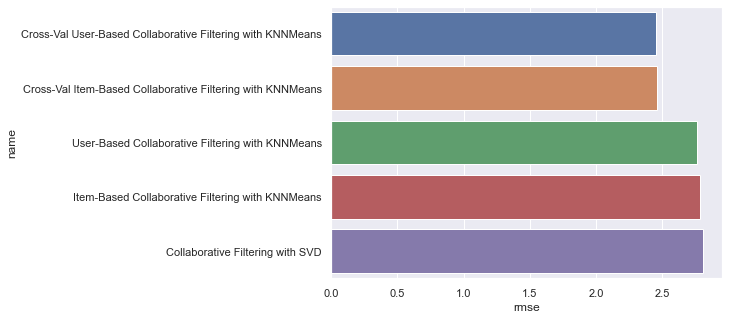

In [49]:
sns.set()
plt.figure(figsize=(7,5))
sns.barplot(x = "rmse", y = "name", data = model_results)
plt.show()

     The best models seem to be Item-based and User-Based Collaborative filtering with KNNMeans fit with cross validation

# 8. Try and recommend top 5 products for test users

In [50]:
# Top 5 recommendations for a sample test user
pred = pd.DataFrame(test_pred)
for uid in pred['uid'].sample():
    print(uid)
    print(pred[pred['uid'] == 'Simon'][['iid', 'r_ui','est']].sort_values(by = 'est', ascending = False).head(5))
    print()

Amazon Customer
                         iid  r_ui        est
19791    sony-ericsson-w850i  10.0  10.000000
4552     sony-ericsson-w200i  10.0   9.888878
1418   motorola-photon-q-lte  10.0   9.847366
37147        motorola-xt1225  10.0   9.671048
32721        apple-iphone-5s  10.0   9.663081



# 9. Check for outliers and impute them as required

<AxesSubplot:xlabel='score'>

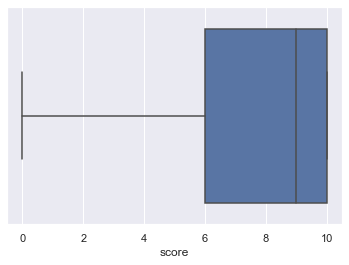

In [51]:
sns.boxplot(train_df.score)

In [52]:
q1 = train_df['score'].quantile(0.25) #first quartile value
q3 = train_df['score'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
low, high, iqr

(0.0, 16.0, 4.0)

In [53]:
# imputation by capping technique | replace outliers with whiskers
train_df.loc[train_df["score"] < low, "score"] = low
train_df.loc[train_df["score"] > high, "score"] = high

# 10. In what business scenario you should use popularity based Recommendation Systems ?

• Recommend products rated high by all users.

• It works without having information on the user.

• It's not personalized for specific users, It uses a simple frequency based recommendations.

• A common approach is to use collaborative filtering whenver we have enough data to avoid cold-start and grey-sheep problems and fall-back to a simple popularity based recommendation system whenever such a problem is there or when we have no data on the current user.


<h3><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">11. In what business scenario you should use CF based Recommendation Systems ?</span></h3>


• Recommend products rated high by users similar to current users (user-based) or items rated similar to current item (item-based)<br>
• It doesn't require any information about the users or the content of the review ..etc., Only the ratings given by other users for the items is sufficient<br>
• Might show you unrelated products if you do it a high-level all-products at once.<br>
• Suffers from cold-start and grey-sheep problem
• Cold-start: New products or new users with no ratings or history columns or rows → Use a hybrid approach with fall-back to content-based reccomendation system<br>
• Grey-sheep problem: One or two ratings for a few products, but none else in the crowd, rated them highly. No neighbours to find -> Switch to popularity based or content-based for the specific user...<br>
• Content-based models can be used to solve the Cold Start and Gray Sheep problems in Collaborative Filtering<br>
• Have to do it a category-level, sub-category level granularity<br>
• de-mean the item rating data to remove item bias<br>
• Generally both user-based and item-based are used to give recommendations<br>
• A common approach is to use collaborative filtering whenver we have enough data to avoid cold-start and grey-sheep problems and use content-based recommendation when we don't have data on user but have enough information on the product (description, reviews...) and fall-back to a simple popularity based recommendation system whenever such a problem is there or when we have no data on the current user.<br></span></h4>
</blockquote>


<h3><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">12. What other possible methods can you think of which can further improve the recommendation for different users</span></h3>


• Deep Learning based models: LSTMS, BiLSTMS (with Bidirection Context), Transformers, BERT .. will be much more effective to learn about sentiment from the reviews using various word embeddings. Several libraries like flair, HuggingFace, keras could be used to build review rating classfifiers.<br>
• Preprocessing of reviews will help the content based models learn a lot better by stripping stop words, removing puncutation, extracting keywords ... etc.,<br>
• Using a Hybrid model with various techniques will almost always yield better results.<br>
• A common approach is to use Latent Factor models for high-level recommendation and then improving them using content-based systems by using the information on users or item    
